In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
out = pd.read_csv('o_all.csv')
out

,buffer_size,prod_or_cons,portion_size,prod_cons_conf,fair,uniform,count
0,10000,prod,0,100+100,True,True,31
1,10000,prod,1,100+100,True,True,22
2,10000,prod,2,100+100,True,True,11
3,10000,prod,3,100+100,True,True,23
4,10000,prod,4,100+100,True,True,31
...,...,...,...,...,...,...,...
289233,100000,prod,65495,1000+1000,False,False,1
289234,100000,prod,65497,1000+1000,False,False,1
289235,100000,prod,65510,1000+1000,False,False,1
289236,100000,prod,65519,1000+1000,False,False,1


In [4]:
grouped = out.groupby(["buffer_size", "prod_or_cons", "prod_cons_conf", "fair", "uniform"])
grouped.count()

portion_size  count
buffer_size prod_or_cons prod_cons_conf fair  uniform                     
10000       prod         100+100        False False           10000  10000
                                              True            10000  10000
                                        True  False           10000  10000
                                              True            10000  10000
                         1000+1000      False False           10000  10000
                                              True            10000  10000
                                        True  False           10000  10000
                                              True            10000  10000
100000      prod         100+100        False False           28769  28769
                                              True            23642  23642
                                        True  False           28898  28898
                                              True            23640  23640
                         1000+1000      False False           27990  27990
                                              True            23568  23568
                                        True  False           29004  29004
                                              True            23727  23727

In [5]:
def plot(group, count):
    def bold(var):
        print(f'\033[1m{var}\033[0m')
    # "buffer_size", "prod_or_cons", "prod_cons_conf", "fair", "uniform"
    bold('Program configuration:')
    print(f'Buffer size: {group[0]}')
    print(f'Producer or consumer: {group[1]}')
    print(f'Producer - consumer configuration: {group[2]}')
    print(f'Is buffer fair: {group[3]}')    
    print(f'Is generator uniform: {group[4]}')    
    
    portion_max_size = group[0] // 2 
    interval_size = group[0] // 100

    count['binned'] = pd.cut(
        count['portion_size'], 
        [x for x in range(0, portion_max_size + interval_size, interval_size)]
    )

    plt.figure(figsize=(15,5))
        
    binned_sum = count.groupby('binned')['count'].sum()
    binned_sum.plot.box()
    plt.show()

    x, y = list(map(list, zip(*list(binned_sum.items()))))
    plt.figure(figsize=(15,5))
    plt.scatter(list(map(str, x)),y)
    plt.gca().get_xaxis().set_visible(False)
    plt.show()

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: False
Is generator uniform: False


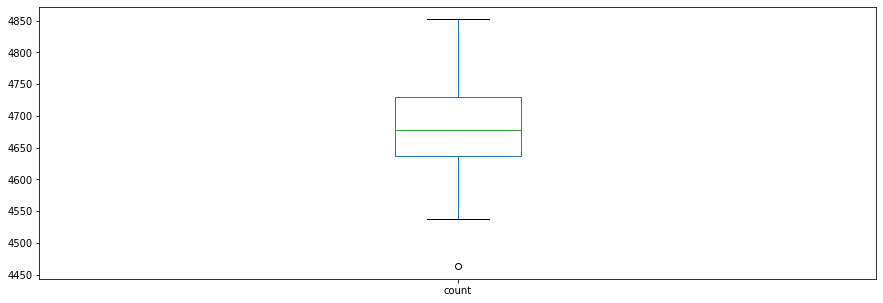

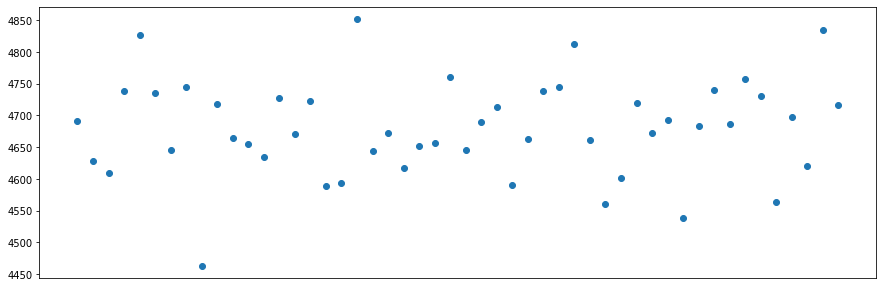

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: False
Is generator uniform: True


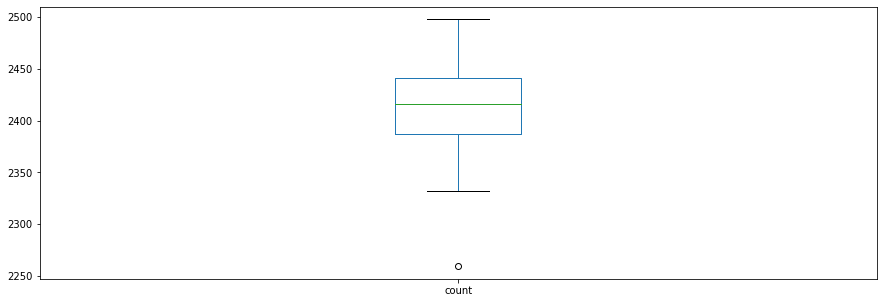

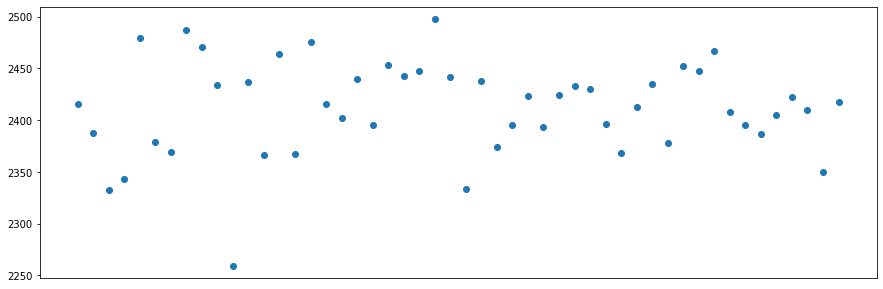

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: True
Is generator uniform: False


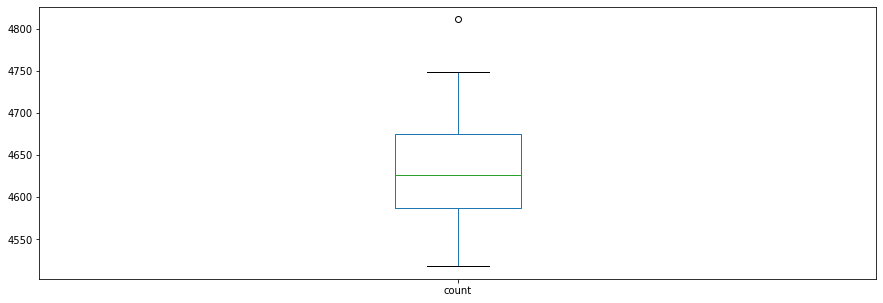

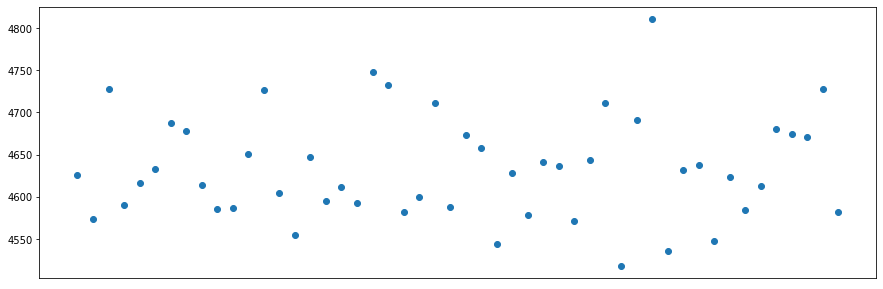

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: True
Is generator uniform: True


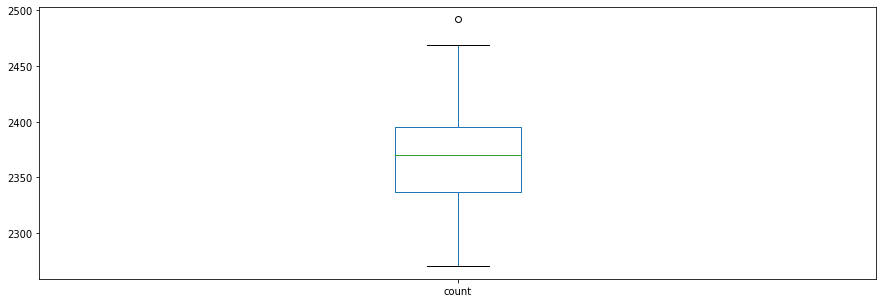

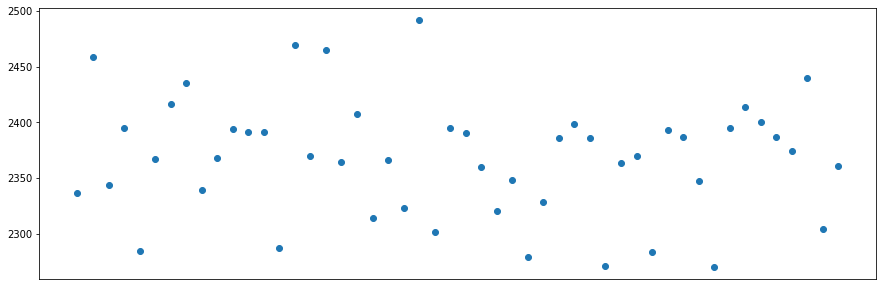

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: False
Is generator uniform: False


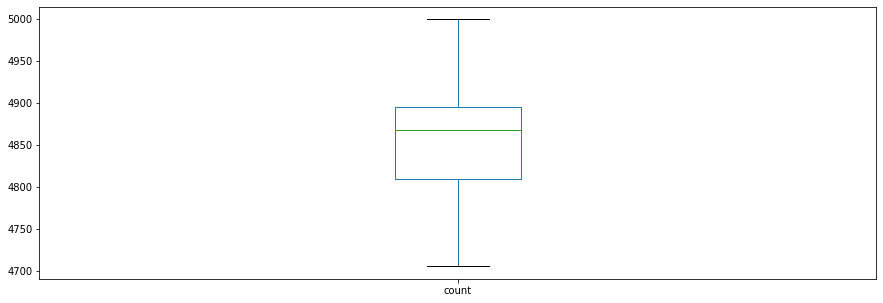

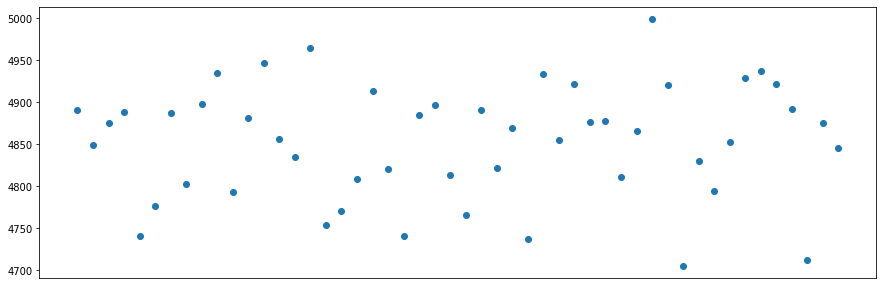

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: False
Is generator uniform: True


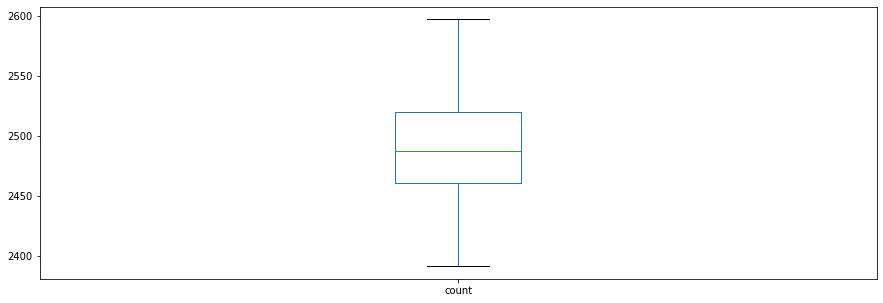

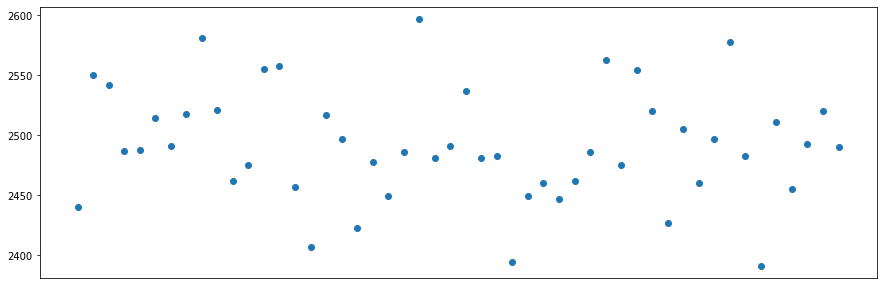

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: True
Is generator uniform: False


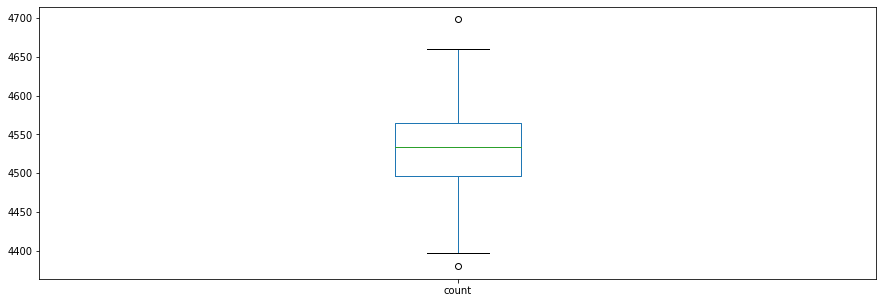

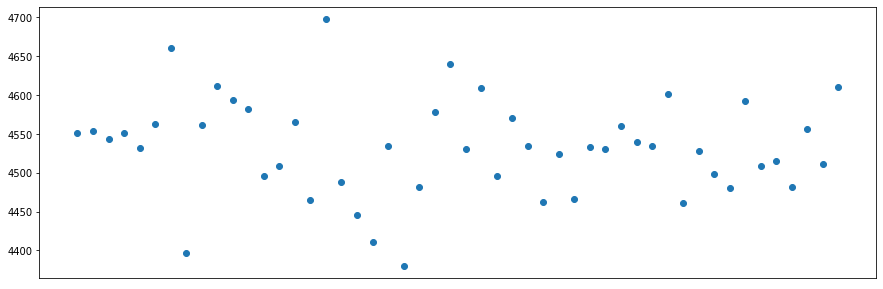

Program configuration:
Buffer size: 10000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: True
Is generator uniform: True


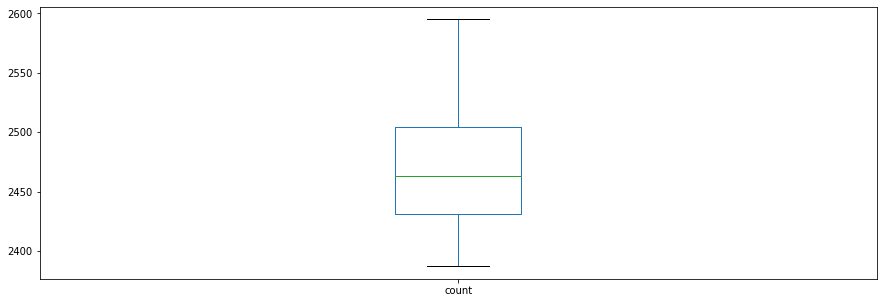

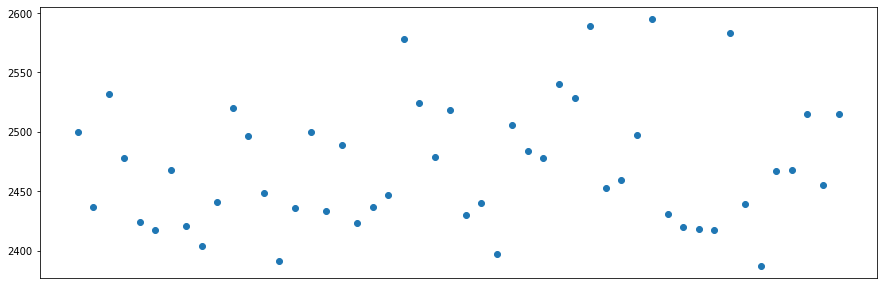

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: False
Is generator uniform: False


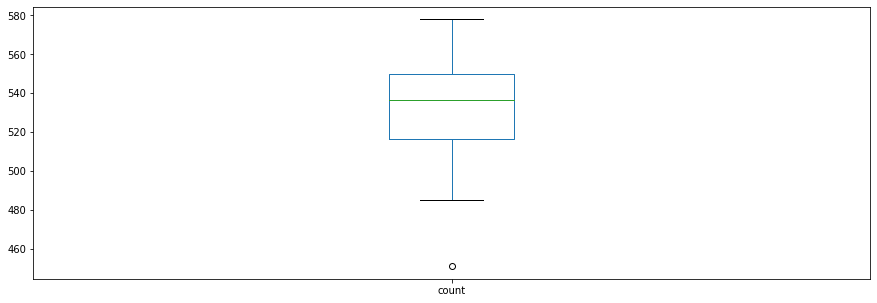

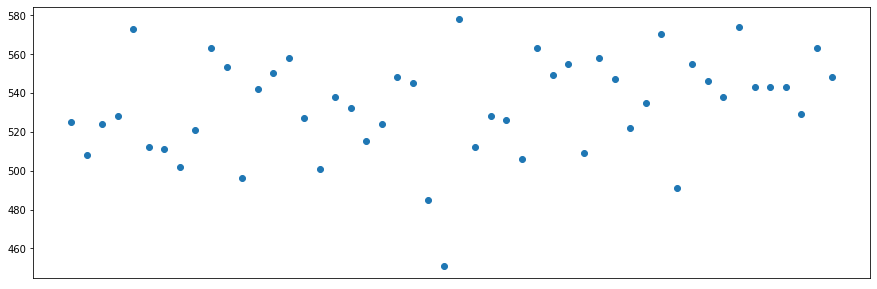

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: False
Is generator uniform: True


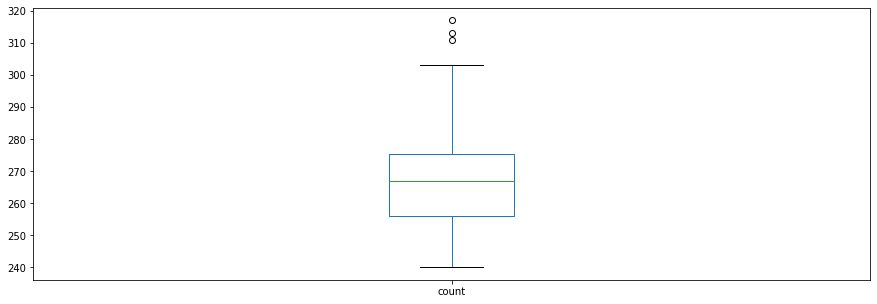

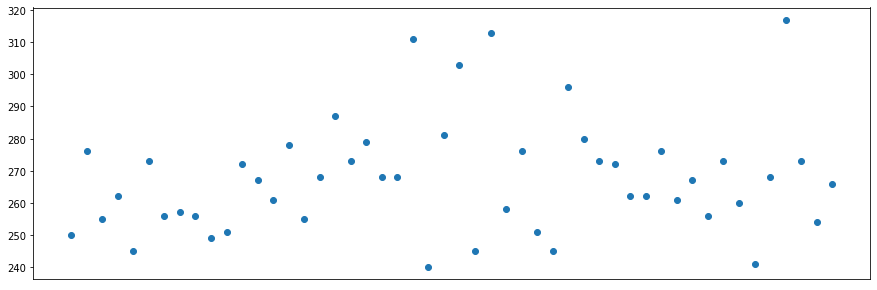

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: True
Is generator uniform: False


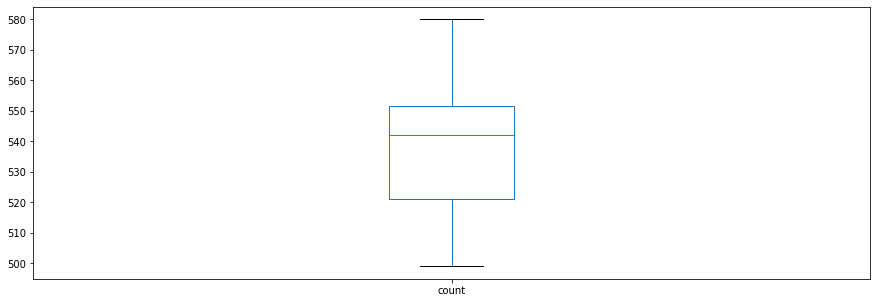

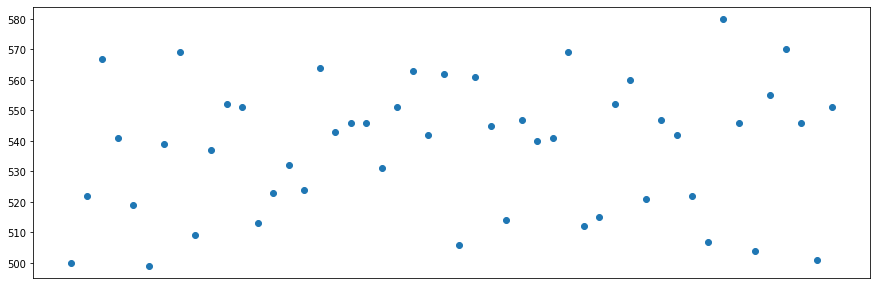

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 100+100
Is buffer fair: True
Is generator uniform: True


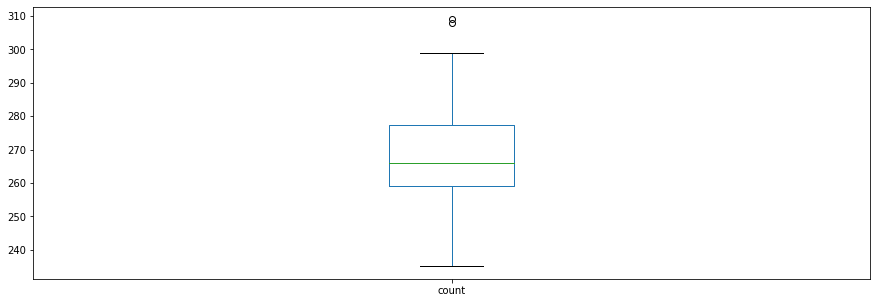

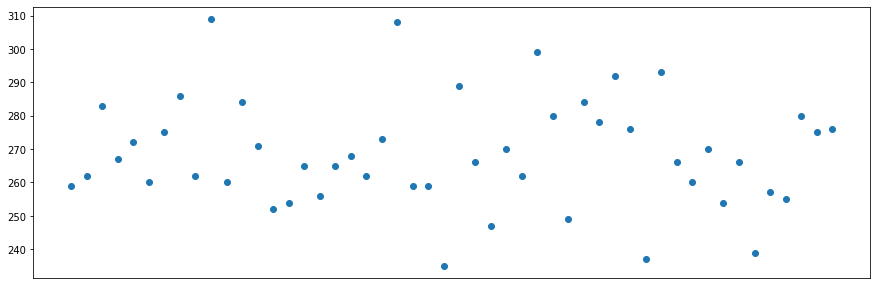

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: False
Is generator uniform: False


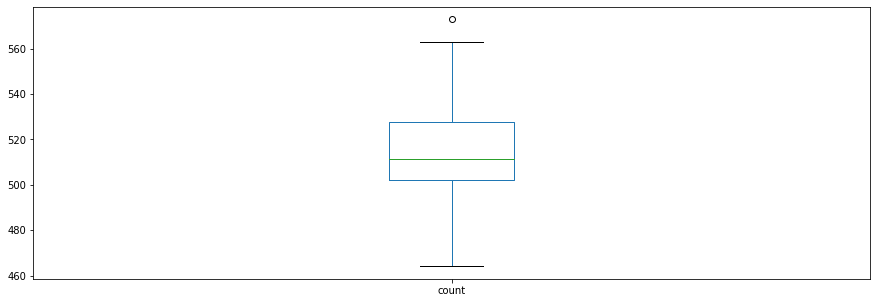

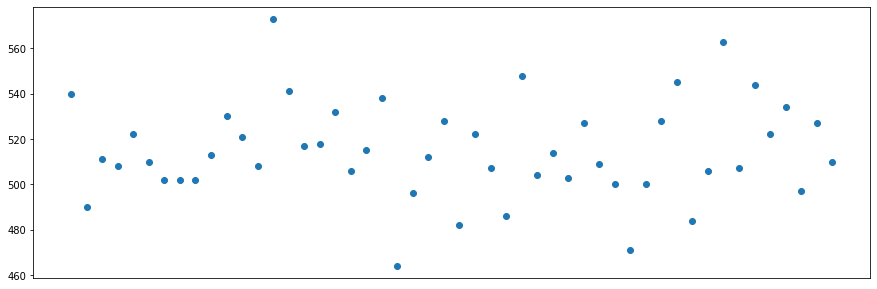

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: False
Is generator uniform: True


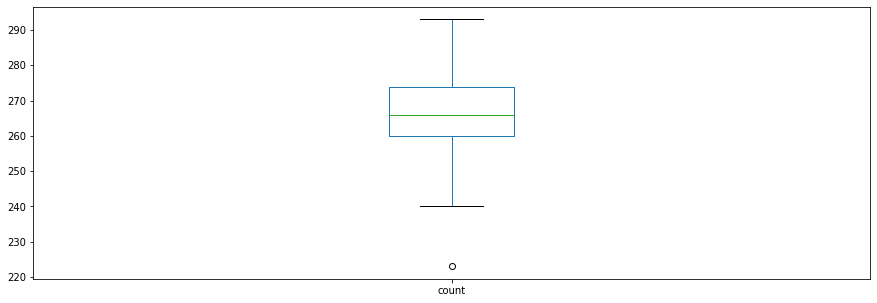

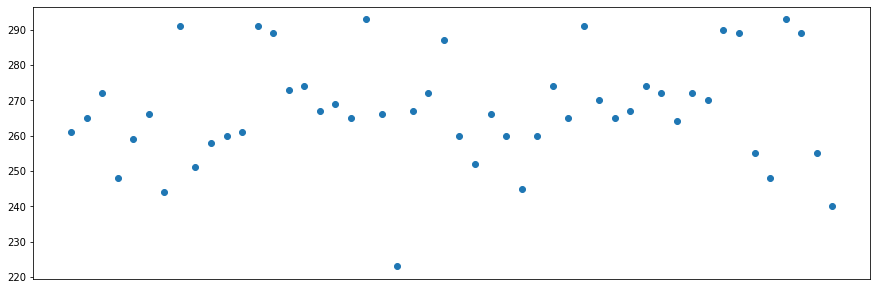

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: True
Is generator uniform: False


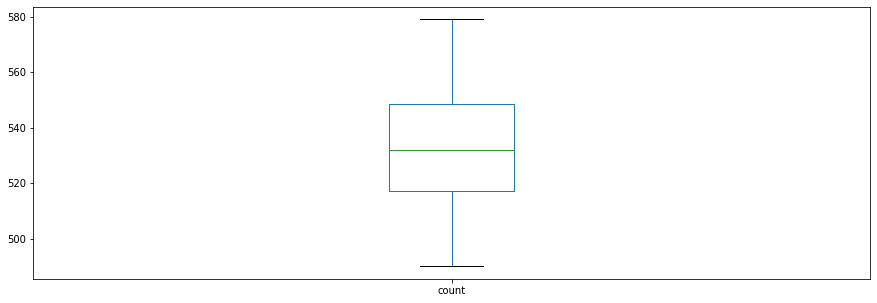

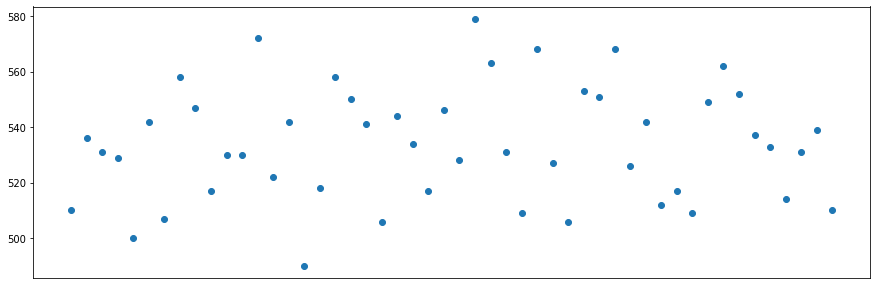

Program configuration:
Buffer size: 100000
Producer or consumer: prod
Producer - consumer configuration: 1000+1000
Is buffer fair: True
Is generator uniform: True


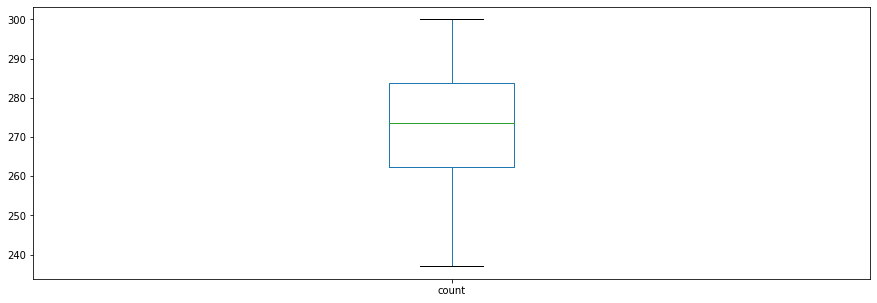

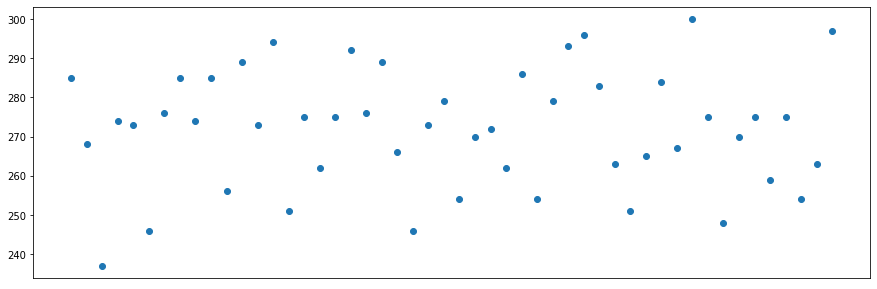

In [6]:
for group, count in grouped:
    plot(group, count)